# Bike Sharing Demand
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.

In [78]:
# Import pandas package
import pandas as pd

# Read the CSV file
bike = pd.read_csv("data/SeoulBikeData.csv")

# Print few observations
print(bike.head())

         Date  Rented Bike Count  Hour  ...  Seasons     Holiday  Functioning Day
0  01/12/2017                254     0  ...   Winter  No Holiday              Yes
1  01/12/2017                204     1  ...   Winter  No Holiday              Yes
2  01/12/2017                173     2  ...   Winter  No Holiday              Yes
3  01/12/2017                107     3  ...   Winter  No Holiday              Yes
4  01/12/2017                 78     4  ...   Winter  No Holiday              Yes

[5 rows x 14 columns]


## Preprocessing

The column names of the dataset needs renaming as some are lengthy.

In [79]:
# Print column names
print(bike.columns)

# Renaming lengthy column names
bike.rename(columns = {
    'Rented Bike Count': 'Count',
    'Temperature(C)': 'Temp',
    'Humidity(%)': 'Humidity',
    'Wind speed (m/s)': 'Wind Speed',
    'Visibility (10m)': 'Visibility', 
    'Dew point temperature(C)': 'Dew Temp',
    'Solar Radiation (MJ/m2)': 'Solar Rad', 
    'Rainfall(mm)': 'Rainfall', 
    'Snowfall (cm)': 'Snowfall', 
    'Functioning Day': 'Day'
}, inplace = True) 

# Checking for null values
print(bike.isna().sum())

# Observe 
print(bike.info())

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')
Date          0
Count         0
Hour          0
Temp          0
Humidity      0
Wind Speed    0
Visibility    0
Dew Temp      0
Solar Rad     0
Rainfall      0
Snowfall      0
Seasons       0
Holiday       0
Day           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        8760 non-null   object 
 1   Count       8760 non-null   int64  
 2   Hour        8760 non-null   int64  
 3   Temp        8760 non-null   float64
 4   Humidity    8760 non-null   int64  
 5   Wind Speed  8760 non-null   float64
 6   Visibility  8760 non-null   int64

## Insights

Observe the barplot shown below. Summer is the season where most bikes are rented. Also, a non-holiday has a slightly better number of rented bikes compared to a holiday. The same observation holds for if the hours are considered instead of seasons. In this setting, bikes rented are high during the late afternoon to early evening hours than any other time window.

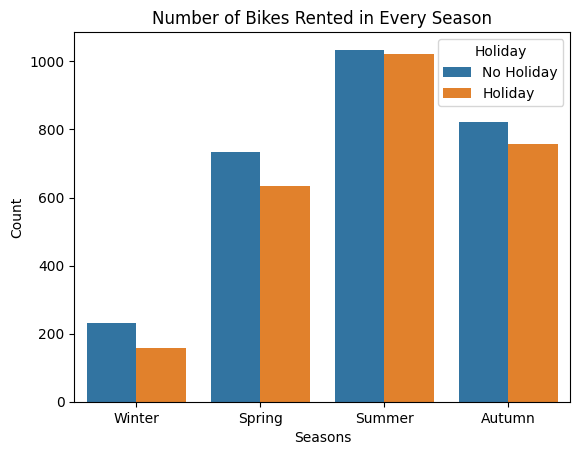

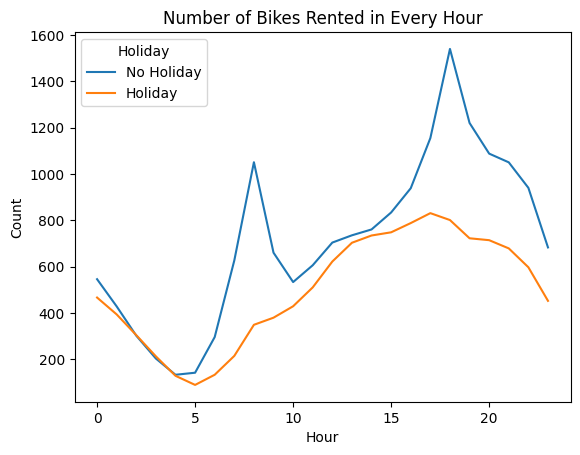

In [80]:
# Import Seaborn and PyPlot
import seaborn as sns
import matplotlib.pyplot as plt

# Barplot for the rented bike count vs. season

sns.barplot(data = bike, x = 'Seasons', y = 'Count', hue = 'Holiday', errorbar = None).set(title = 'Number of Bikes Rented in Every Season')

plt.savefig('bike_bar.png')
plt.show()

sns.lineplot(data = bike, x = 'Hour', y = 'Count', hue = 'Holiday', errorbar = None).set(title = 'Number of Bikes Rented in Every Hour')

plt.savefig('bike_line.png')
plt.show()

## One-Hot Encoding

Machine learning requires numerical values for training a model. One-hot encoding is a way to turn variables from categorical into numerical.

In [81]:
# Separate the target column
target = bike['Count'].values

# Drop date column
bike = bike.drop(['Date', 'Count'], axis = 1)

# One-hot encode categorical features
bike_dummies = pd.get_dummies(bike, drop_first = True)

## Feature Correlation

Temperature and dew point temperatures are the highly correlated features in the dataset. A principal component analysis helps mitigate correlation. Note that decision tree-based models are immune to multicollinearity.   

<AxesSubplot: >

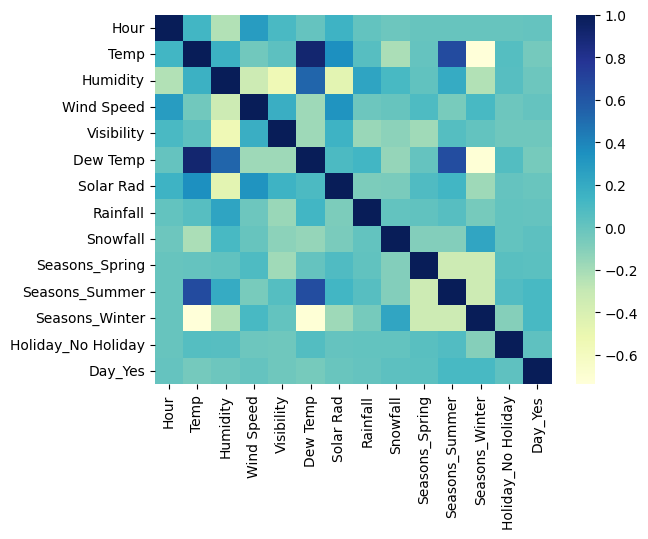

In [82]:
sns.heatmap(bike_dummies.corr(), cmap="YlGnBu", annot=False)

## Decision Tree-Based Model

We use a decision tree to predict the number of bikes rented. The coefficient of determination score is 0.79.

In [91]:
print(X.shape, target.shape)

(8760, 14) (8760,)


In [98]:
# Import necessary scikit-learn functions
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Split data for training and testing
X = bike_dummies.values
X_train, X_test, y_train, y_test = train_test_split(X, target, random_state = 2023)

# Model fitting
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

print(dtr.score(X_test, y_test))

0.7403684232487087


## Decision Tree-Based Model (Part 2)

We also utilize a model made up of multiple decision trees. This model is called a Random Forest model. The coefficient of determination score is slightly better than the previous model. For predictions, we can use this model instead.

In [99]:
# Import random forest regressor model
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

rfr.score(X_test,y_test)

0.8688781434333822

[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 